<a href="https://colab.research.google.com/github/gabrielhribeiro/Dash_Dashboard/blob/master/Foodback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample

In [ ]:
!pip install demoji

In [ ]:
#@title Imports
import unicodedata as uni
import pandas as pd
import json
import demoji
from google.colab import drive

In [ ]:
#@title Load Google Drive Files
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#@title Read Files from Drive
data_file_business = open("/content/gdrive/MyDrive/ISEP/yelp_academic_dataset_business.json")
data = [] 

for line in data_file_business:
  data.append(json.loads(line))
business_df = pd.DataFrame(data)
data_file_business.close()

print(business_df.head())

data_file_reviews = open("/content/gdrive/MyDrive/ISEP/yelp_academic_dataset_review.json")
data = []

for line in data_file_reviews:
  data.append(json.loads(line))
reviews_df = pd.DataFrame(data)
data_file_reviews.close()

print(reviews_df.head())

data_file_reviews = open("//content/gdrive/MyDrive/ISEP/Projeto3/Foodback.ipynb")

In [ ]:
#@title generate 6000.000 lines for sample

#save data at the project3, if exist the file at the folder(Project3), dont run it. 
dfyelpnotnull = business_df[business_df['categories'].notna()]
#select just restaurants
dfyelpcleanest = dfyelpnotnull[dfyelpnotnull['categories'].str.contains("Restaurants")]

dfyelp = pd.merge(reviews_df, business_df, on=['business_id','business_id'])
dfyelpnotnull = dfyelp[dfyelp['categories'].notna()]


dfloaded = dfyelpnotnull.iloc[:600000, :]
dfloaded.to_csv('/content/gdrive/MyDrive/ISEP/Projeto3/cleaned6000reviews.csv', index=False)

# Explore - Data Acquisition 

In [ ]:
#load the data in a dataframe, if get time or overflow the ram, reduce the lines 600.000 to a lower to be useful to run

df = pd.read_csv('/content/gdrive/MyDrive/ISEP/Projeto3/cleaned6000reviews.csv')

# display the DataFrame
display(df)

In [ ]:
#Describe Columns
df.info()

In [ ]:
df.head()

<Figure size 1800x1440 with 0 Axes>

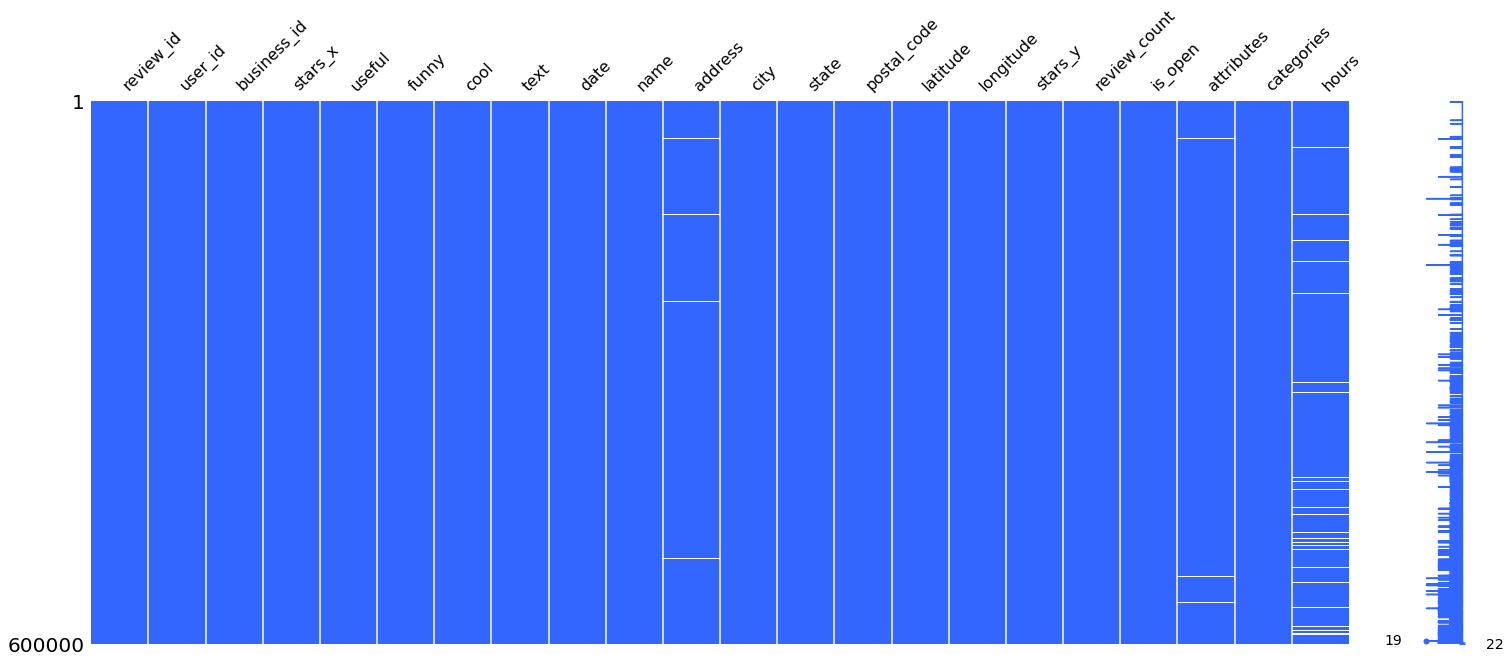

In [ ]:
#identify missinformation

import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df.dropna(inplace=True, axis=0)
df.info()

<Figure size 1800x1440 with 0 Axes>

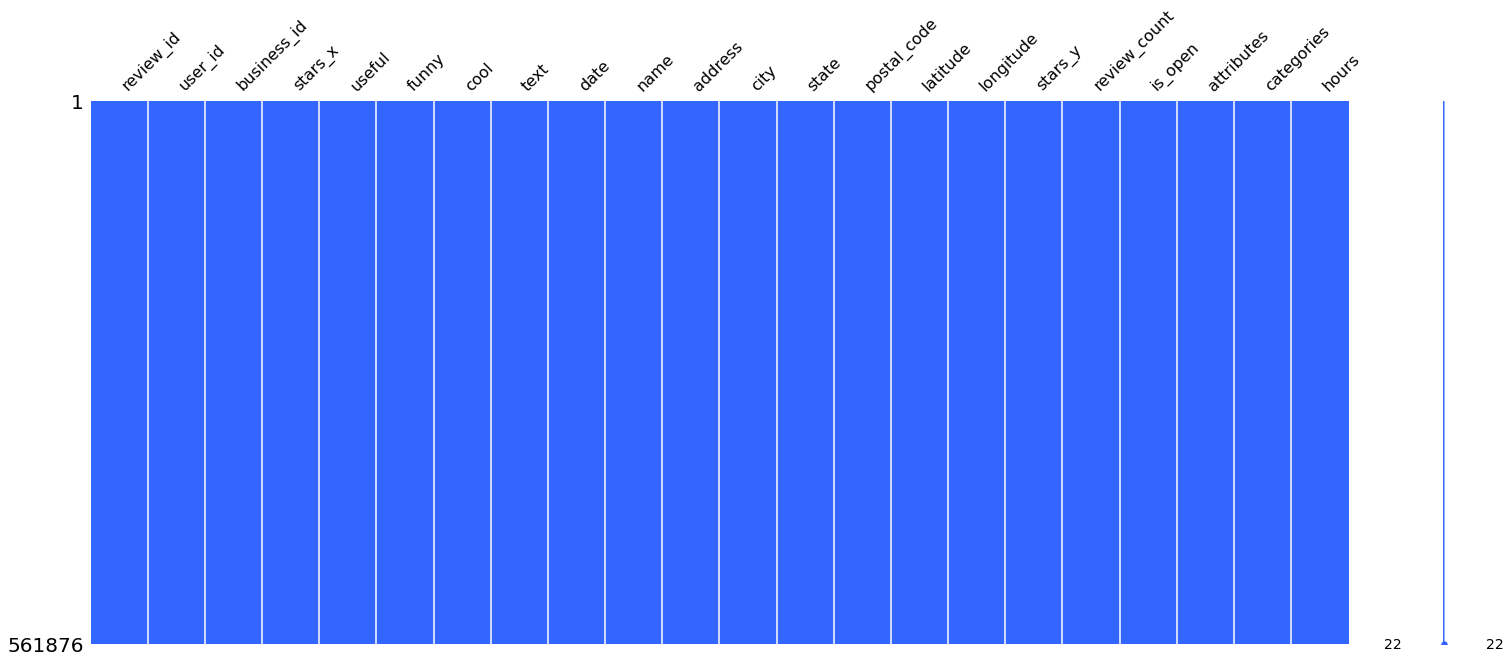

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
#@title Data Cleaning

#To use this function at the text column, should verify if the content of tett 
#column has some http value. 

import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [ ]:
#@title Unicode Normalization
#In this notebook I Will be using NFKD approach this is the one we use more frequently in NLP.
#https://towardsdatascience.com/what-on-earth-is-unicode-normalization-56c005c55ad0

df['text'] = df['text'].apply(lambda x: uni.normalize('NFKD', x))

In [ ]:
#Handling Emoji ‘😍😍’ & Emoticon ‘ :) ’
#should verify if exists emoji to remove it, slow to run this snippet.

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

df['text'] = df['text'].apply(lambda x: handle_emoji(x))

In [ ]:
#@title Text Pre-Processing 
#for the next step check: https://www.kaggle.com/code/nkitgupta/aspect-based-sentiment-analysis

In [ ]:
# 4.1 Preliminaries 

In [ ]:
# 4.2 Frequent Steps 

In [ ]:
 #4.2.1 Removing Stop Words 

In [ ]:
# 4.2.2 Stemming

In [ ]:
# 4.2.3 Lemmatization